In [5]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from matplotlib import pyplot as plt 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D  
plt.style.use('ggplot') 


In [6]:
data = pd.read_csv(r"C:\Users\srikanth\Desktop\creditcard.csv\creditcard.csv") 
data.shape 

(284807, 31)

In [7]:
data.isnull().any().sum() 

0

In [8]:
All = data.shape[0] 
fraud = data[data['Class'] == 1] 
nonFraud = data[data['Class'] == 0] 
x = len(fraud)/All 
y = len(nonFraud)/All 
print('frauds :',x*100,'%') 
print('non frauds :',y*100,'%') 
print(len(fraud)) 

frauds : 0.1727485630620034 %
non frauds : 99.82725143693798 %
492


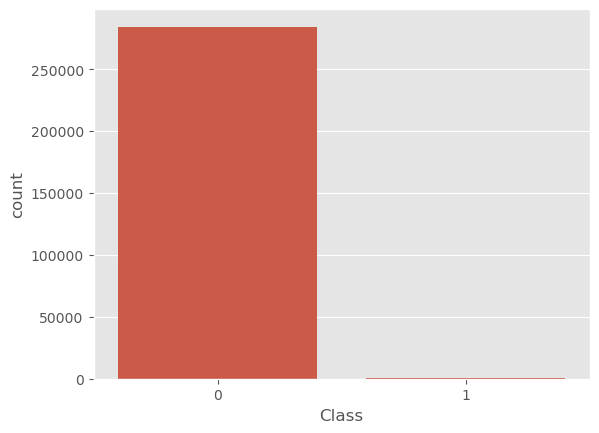

In [9]:
sns.countplot(x='Class',data=data) 
plt.show() 

In [10]:
data.drop('Time', axis=1, inplace=True) 

In [11]:
X = data.drop('Class', axis=1) 
y = data['Class'] 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [13]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train, y_train) 
y_pred_knn = knn_model.predict(X_test) 

In [15]:
lr_model = LogisticRegression(max_iter=10000) 
lr_model.fit(X_train, y_train) 
y_pred_lr = lr_model.predict(X_test) 

In [16]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train) 
y_pred_rf = rf_model.predict(X_test) 


In [17]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print("Accuracy:", round(accuracy, 4))
    print("Precision:", round(precision, 4))
    print("Recall:", round(recall, 4))
    print("F1 Score:", round(f1, 4))


In [18]:
print("Evaluation for KNN Model:") 
evaluate_model(y_test, y_pred_knn) 
print("\nEvaluation for Logistic Regression Model:") 
evaluate_model(y_test, y_pred_lr) 
print("\nEvaluation for Random Forest Model:") 
evaluate_model(y_test, y_pred_rf)

Evaluation for KNN Model:
Accuracy: 0.9994
Precision: 0.8678
Recall: 0.7721
F1 Score: 0.8171

Evaluation for Logistic Regression Model:
Accuracy: 0.9993
Precision: 0.8763
Recall: 0.625
F1 Score: 0.7296

Evaluation for Random Forest Model:
Accuracy: 0.9996
Precision: 0.9412
Recall: 0.8235
F1 Score: 0.8784
